In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('iris.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


# Correlation

In [60]:
np.corrcoef(df['sepal_length'],df['sepal_width'])

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

In [61]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [62]:
df.sepal_length.corr(df.sepal_width)

-0.1093692499506493

# Correlation and p-value significence

In [79]:
from scipy import stats

In [80]:
corr = stats.pearsonr(df.sepal_length,df.sepal_width)
corr

(-0.10936924995064938, 0.1827652152713699)

In [81]:
c,p = corr
print(c) #correlation
print(p) # p-value

-0.10936924995064938
0.1827652152713699


In [82]:
corr_df = pd.DataFrame(columns = ['c', 'p'])
for col in df:
    print(col)
    if(pd.api.types.is_numeric_dtype(df[col]) and col != 'sepal_length'):
        c, p = stats.pearsonr(df.sepal_length, df[col])
        corr_df.loc[col] = [round(c,3), round(p,3)]
corr_df        

sepal_length
sepal_width
petal_length
petal_width
class


,c,p
sepal_width,-0.109,0.183
petal_length,0.872,0.000
petal_width,0.818,0.000
class,0.783,0.000


In [ ]:
#Encode class

In [67]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df.iloc[:,4] = label_encoder.fit_transform(df.iloc[:,4]).astype('float64')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [83]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

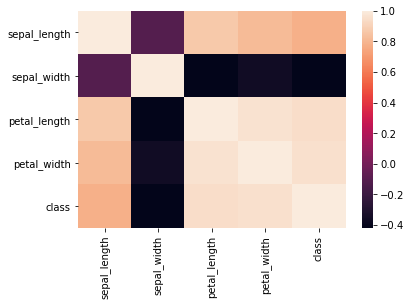

In [70]:
import seaborn as sns
corr1 = df.corr()
sns.heatmap(corr1)

In [75]:
corr2 = stats.pearsonr(df['class'], df.sepal_length)
corr2

(0.7825612318100813, 2.8904783526141205e-32)

In [76]:
c,p = corr2
print(c) #correlation
print(p) # p-value

0.7825612318100813
2.8904783526141205e-32


In [78]:
corr_df = pd.DataFrame(columns = ['c', 'p'])
for col in df:
    print(col)
    if(pd.api.types.is_numeric_dtype(df[col]) and col != 'class'):
        c, p = stats.pearsonr(df['class'], df[col])
        corr_df.loc[col] = [round(c,3), round(p,3)]
corr_df        

sepal_length
sepal_width
petal_length
petal_width
class


,c,p
sepal_length,0.783,0.0
sepal_width,-0.419,0.0
petal_length,0.949,0.0
petal_width,0.956,0.0


# Examples 1

# T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# One-sample T-test with Python

The test will tell us whether means of the sample and the population are different

In [10]:
len(df.sepal_length)

150

In [11]:
sepal_length_mean=np.mean(df.sepal_length)
print(sepal_length_mean)

5.843333333333335


In [12]:
#Lets take sample

sample_size=10
sepal_length_sample=np.random.choice(df.sepal_length,sample_size)
sepal_length_sample

array([4.7, 4.4, 5.8, 5. , 4.4, 4.8, 5.9, 5.1, 6.2, 5. ])

In [13]:
from scipy.stats import ttest_1samp

In [14]:
ttest,p_value=ttest_1samp(sepal_length_sample,6) # 6 here is the sepal_length_mean

In [15]:
print(p_value)

0.0018194168913878467


In [16]:
if p_value < 0.05:    # alpha value is 0.05 or 5% (alpha is significence)
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

In [17]:
#np.random.seed(10)
sepal_length_sample1=stats.poisson.rvs(loc=5,mu=5.5,size=10)
sepal_length_sample1.mean()

10.2

In [18]:
_,p_value=stats.ttest_ind(a=sepal_length_sample,b=sepal_length_sample1,equal_var=False)
print(p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

7.91241941221639e-06
 we are rejecting null hypothesis


# Example 2

In [19]:
data = pd.read_csv('DiseaseData.csv')

In [20]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [21]:
#Removing the Id and the Unnamed columns
data = data.iloc[:,1:-1]
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data.iloc[:,0]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

<AxesSubplot:>

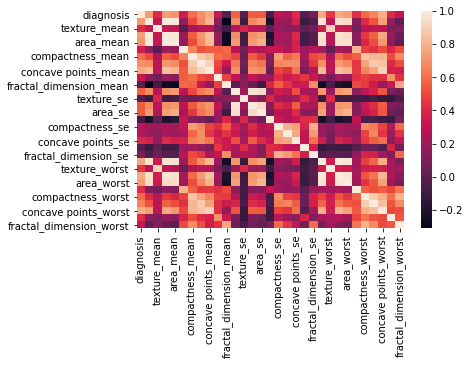

In [23]:
#Feature selection — Correlation and P-value
#Generating the correlation matrix
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [24]:
#Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [25]:
#the dataset has only those columns with correlation less than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data1 = data[selected_columns]
data1

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,1.0,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,1.0,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,1.0,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,1.0,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,1.0,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,1.0,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,1.0,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [26]:
len(selected_columns)

21

In [27]:
selected_columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Selecting columns based on p-value
Next we will be selecting the columns based on how they affect the p-value. We are the removing the column 'diagnosis' because it is the column we are trying to predict

In [28]:
#removing 'diagnosis' class
selected_columns = selected_columns[1:].values
selected_columns

array(['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [29]:
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns1 = backwardElimination(data1.iloc[:,1:].values, data1.iloc[:,0].values, SL, selected_columns)

In [30]:
print(data1.iloc[:,1:].values) #without class
print(data1.iloc[:,0].values) #only class
print(SL)
print(selected_columns)

[[17.99    10.38     0.1184  ...  0.7119   0.4601   0.1189 ]
 [20.57    17.77     0.08474 ...  0.2416   0.275    0.08902]
 [19.69    21.25     0.1096  ...  0.4504   0.3613   0.08758]
 ...
 [16.6     28.08     0.08455 ...  0.3403   0.2218   0.0782 ]
 [20.6     29.33     0.1178  ...  0.9387   0.4087   0.124  ]
 [ 7.76    24.54     0.05263 ...  0.       0.2871   0.07039]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0

In [31]:
print(data_modeled)
print(selected_columns1) #new selected columns

[[17.99    10.38     0.3001  ...  0.7119   0.4601   0.1189 ]
 [20.57    17.77     0.0869  ...  0.2416   0.275    0.08902]
 [19.69    21.25     0.1974  ...  0.4504   0.3613   0.08758]
 ...
 [16.6     28.08     0.09251 ...  0.3403   0.2218   0.0782 ]
 [20.6     29.33     0.3514  ...  0.9387   0.4087   0.124  ]
 [ 7.76    24.54     0.      ...  0.       0.2871   0.07039]]
['radius_mean' 'texture_mean' 'concavity_mean' 'fractal_dimension_mean'
 'radius_se' 'compactness_se' 'concavity_se' 'concave points_se'
 'fractal_dimension_se' 'smoothness_worst' 'concavity_worst'
 'symmetry_worst' 'fractal_dimension_worst']


In [32]:
data1.iloc[:,0]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [33]:
#copy class to another DF
result = pd.DataFrame()
result['diagnosis'] = data1.iloc[:,0]
result

,diagnosis
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
564,1.0
565,1.0
566,1.0
567,1.0


In [34]:
print(data_modeled.shape)
print(selected_columns1.shape)
print(result['diagnosis'].shape)

(569, 13)
(13,)
(569,)


In [35]:
pd.DataFrame(data_modeled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,17.99,10.38,0.30010,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.16220,0.7119,0.4601,0.11890
1,20.57,17.77,0.08690,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.12380,0.2416,0.2750,0.08902
2,19.69,21.25,0.19740,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.14440,0.4504,0.3613,0.08758
3,11.42,20.38,0.24140,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.20980,0.6869,0.6638,0.17300
4,20.29,14.34,0.19800,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.24390,0.05623,1.1760,0.02891,0.05198,0.02454,0.004239,0.14100,0.4107,0.2060,0.07115
565,20.13,28.25,0.14400,0.05533,0.7655,0.02423,0.03950,0.01678,0.002498,0.11660,0.3215,0.2572,0.06637
566,16.60,28.08,0.09251,0.05648,0.4564,0.03731,0.04730,0.01557,0.003892,0.11390,0.3403,0.2218,0.07820
567,20.60,29.33,0.35140,0.07016,0.7260,0.06158,0.07117,0.01664,0.006185,0.16500,0.9387,0.4087,0.12400


In [36]:
#Creating a Dataframe with the columns selected using the p-value and correlation
data2 = pd.DataFrame(data = data_modeled, columns = selected_columns1)
data2

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.30010,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.16220,0.7119,0.4601,0.11890
1,20.57,17.77,0.08690,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.12380,0.2416,0.2750,0.08902
2,19.69,21.25,0.19740,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.14440,0.4504,0.3613,0.08758
3,11.42,20.38,0.24140,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.20980,0.6869,0.6638,0.17300
4,20.29,14.34,0.19800,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.24390,0.05623,1.1760,0.02891,0.05198,0.02454,0.004239,0.14100,0.4107,0.2060,0.07115
565,20.13,28.25,0.14400,0.05533,0.7655,0.02423,0.03950,0.01678,0.002498,0.11660,0.3215,0.2572,0.06637
566,16.60,28.08,0.09251,0.05648,0.4564,0.03731,0.04730,0.01557,0.003892,0.11390,0.3403,0.2218,0.07820
567,20.60,29.33,0.35140,0.07016,0.7260,0.06158,0.07117,0.01664,0.006185,0.16500,0.9387,0.4087,0.12400


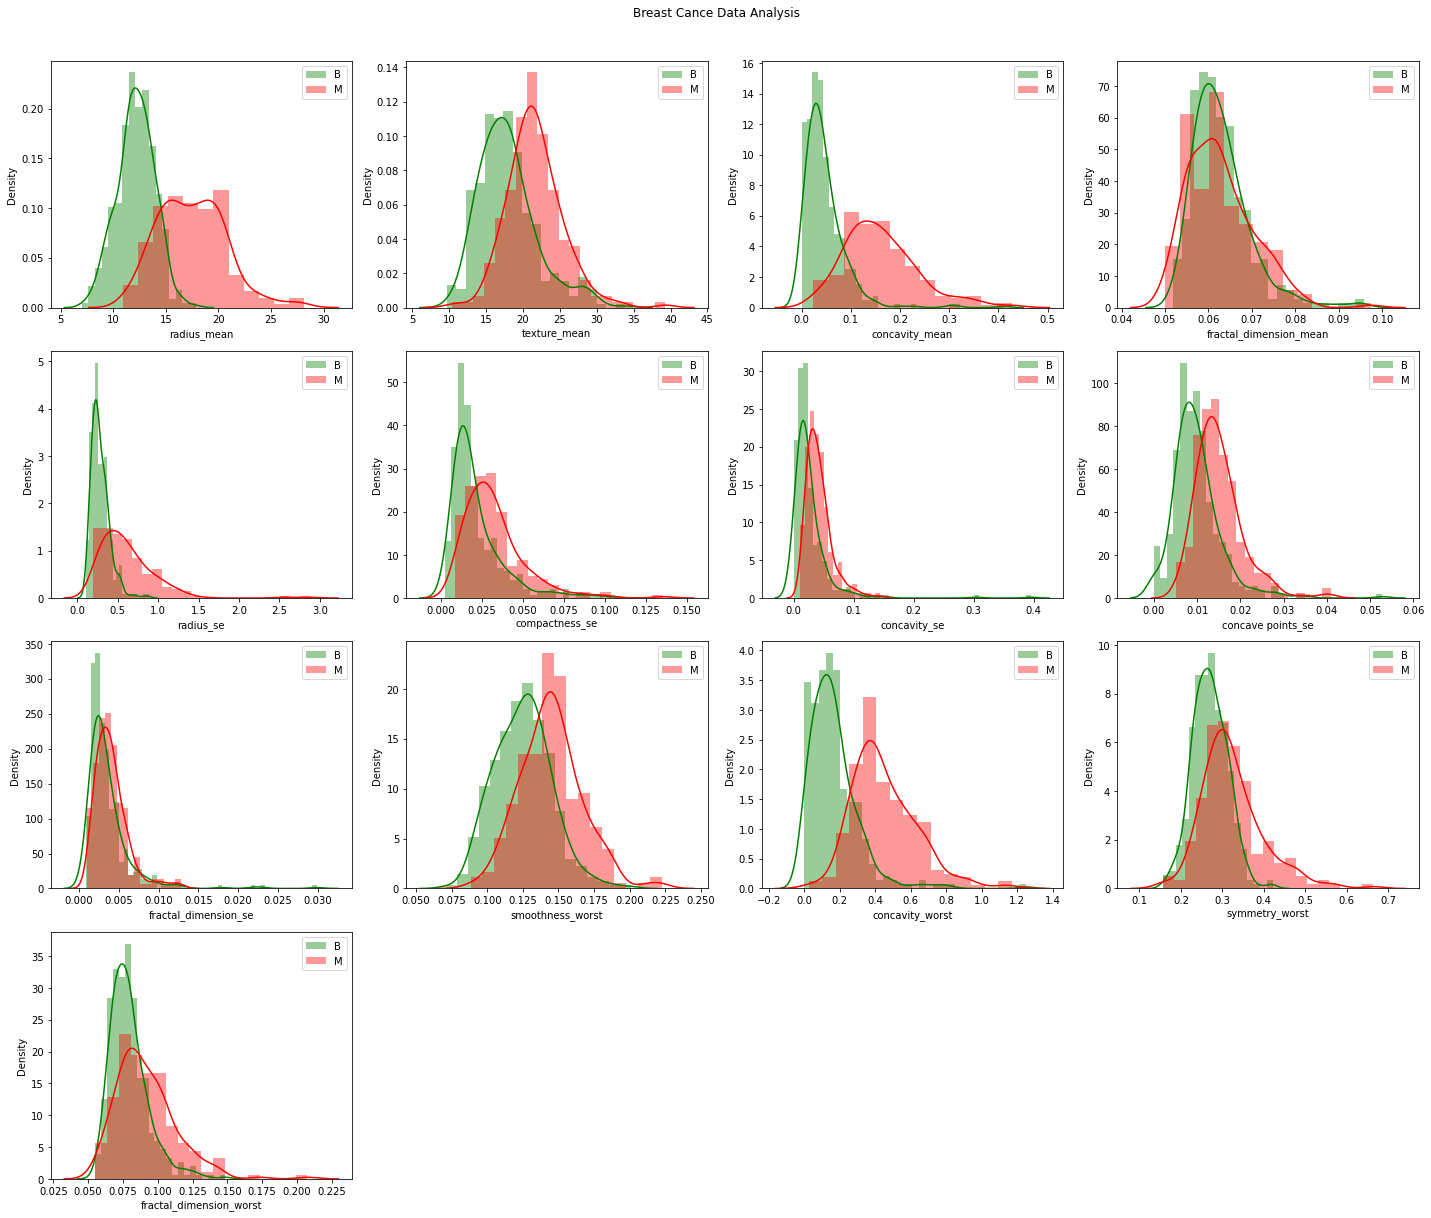

In [37]:
#visualization of selected features
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize = (20, 25))
j = 0
for i in data2.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data2[i][result['diagnosis']==0], color='g', label = 'B')
    sns.distplot(data2[i][result['diagnosis']==1], color='r', label = 'M')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data2.values, result.values, test_size = 0.2)

In [40]:
print(x_train.shape)
print(x_test.shape)

(455, 13)
(114, 13)


In [41]:
#Build a model with selected features
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC()

In [42]:
prediction = svc.predict(x_test)

In [43]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8771929824561403


In [44]:
#Compare prediction results without feature selection

data3 = pd.read_csv('DiseaseData.csv')          
data3.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [45]:
x = data3.iloc[:,2:-1]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
y = data3.iloc[:,1]                         
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [47]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x.values, y.values, test_size = 0.2)      
svc1 = SVC()
svc1.fit(x_train1, y_train1)
prediction1 = svc1.predict(x_test1)

In [48]:
cm1 = confusion_matrix(y_test1, prediction1)
sum = 0
for i in range(cm1.shape[0]):
    sum += cm[i][i]
    
accuracy1 = sum/x_test1.shape[0]                
print(accuracy1)

0.8771929824561403


# Feature Selection

In [49]:
#VarianceThreshold (Removing features with low variance)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) #don't change these values
x_new = sel.fit_transform(x)
print(x.shape)
print(x_new.shape)

(569, 30)
(569, 11)


In [ ]:
# SelectKBest (Univariate feature selection) (univariate scores and p-values)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_new1 = SelectKBest(chi2, k=5).fit_transform(x, y) #k = 5, can be changed. value is to choose best 5 features from data.
print(x.shape)
print(x_new1.shape)

In [51]:
#L1-based feature selection (Feature selection using SelectFromModel) (select the non-zero coefficients)
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
x_new2 = model.transform(x)
print(x.shape)
print(x_new2.shape)

(569, 30)
(569, 5)


# 1. Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:
#You can download the dataset from here https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# 2. Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 4. Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# 5. Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

Learn more about the PCA class in scikit-learn by reviewing the PCA API. Dive deeper into the math behind PCA on the Principal Component Analysis Wikipedia article.

In [ ]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

# 6. Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [ ]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

# Feature Selection Techniques in Machine Learning

### Goal

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

(Code Available on the link in the shape of images)

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The techniques for feature selection in machine learning can be broadly classified into the following categories:

Supervised Techniques: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.

Unsupervised Techniques: These techniques can be used for unlabeled data.

From a taxonomic point of view, these techniques are classified as under:

A. Filter methods

B. Wrapper methods

C. Embedded methods

D. Hybrid methods

In this article, we will discuss some popular techniques of feature selection in machine learning.

# A. Filter methods
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

Let’s, discuss some of these techniques:

### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, dataframe.columns[0:len(dataframe.columns)-1])
feat_importances.plot(kind= 'barh', color = 'teal')
plt.show()

### Chi-square Test
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Convert to categorical data by converting data to integers
X_cat = X.astype(int)

#Three features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)
#Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

### Fisher’s Score
Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [ ]:
from Skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

#Calculating scores
ranks_fisher_score.fisher_score(X, Y)

#PLotting the ranks
feat_importances = pd.Series(ranks, dataframe.columns[0:len(dataframe.columns)-1]
feat_importances.plot(kind ='barh', color = 'teal')
plt.show()

### Correlation Coefficient
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

We need to set an absolute value, say 0.5 as the threshold for selecting the variables. If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Correation matirix
cor = dataframe.corr()
#PLotting Heatmap

plt.figure (figsize (10,6))
sns.heatmap(cor, annot = True)

### Variance Threshold
The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

#Resetting the vatue of X to make it non-categorical
X array[:,0:8]

v_threshold = VarianceThreshold(threshold = 0)
v_threshold.fit(X) #fit finds the features with zero variance
v_threshold.get_support()

### Mean Absolute Difference (MAD)
‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ [1] This means that higher the MAD, higher the discriminatory power.

In [ ]:
#CalcuLate MAD
mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis = 0)), axis 0)/X.shape[0]

# PLot the barchart
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color = 'teal')

# B. Wrapper Methods:
Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

Let’s, discuss some of these techniques:

### Forward Feature Selection
This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.



In [ ]:
#Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
ffs = SequentialFeatureSelector(lr, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(X, Y)
features = 1ist(ffs.k_feature_names_)
features = 1ist (map(int,features))
1r.fit(x_train[features], y_train)
y_pred = Ir.predict(x_train[features])

### Backward Feature Elimination
This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

This method along with the one discussed above is also known as the Sequential Feature Selection method.

In [ ]:
# Backward Feature Selection
from sklearn.1inear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
Ir = LogisticRegression(class_weight = 'balanced', solver = '1bfgs', random_state = 42, n_jobs = -1, max_iter = 500)
Ir.fit(X, Y)
bfs = SequentialFeatureselector(lr, k_features = 'best', forward = False, n_jobs = -1)
bfs.fit(X, Y)
features = list(bfs.k_feature_names)
features = list(map(int, features))
Ir.fit(x_train[features], y_train)
y_pred = Ir.predict(x_train[features])

### Exhaustive Feature Selection
This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

#import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestclassifier

# create the ExhaustiveFeatureselector object.
efs = ExhaustiveFeatureselector(RandomForestclassifier(),
    min_features = 4
    max_features = 8
    scoring = 'roc_auc'
    CV = 2)

# fit the object to the training data.
efs = efs.fit(X, Y)

# print the selected features
selected_features = x_train.columns[list(efs.best_idx_)]
print(selected_features)

# print the final prediction score.
print(efs.best_score)

### Recursive Feature Elimination
‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’[2]

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select = 7)
rfe.fit(x_train, y_train)
y_pred = rfe.predict(x_train)

# C. Embedded Methods:
These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

Let’s, discuss some of these techniques click here:

### LASSO Regularization (L1)
Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Set the regularization parameter C=1
logistic = LogisticRegression(C = 1, penalty = 'l1', solver = '1iblinear', random_state = 7).fit(X, Y)
model = SelectFromModel(1ogistic, prefit = True)
X_new = model.transform(X)

#Dropped columns have values of alL 0s Reep ather columns
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

### Random Forest Importance
Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [ ]:
from sklearn.ensemble import RandomForestclassifier

#create the random forest with your hyperparameters.
model = RandomForestclassifier(n_estimators = 340)

#fit the model to start training
model.fit(X, Y)

#get the importance of the resulting features.
importances = model.feature_importances_

#create a data frame for visuaLization
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index('Importances')

#Sort in ascending order to better visualization
final_df = final_df.sort_values('Importiances')
                              
#plot the feature importances in bars
final_df.plot.bar(color = 'teal')

# D. Hybrid Method
There are hybrid methods too that use both filtering and wrapping techniques